출처: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

# Part1: Exploratory Data Analysis(EDA)
    1) feature 분석
    2) 여러개의 feature들을 토대로 연관성 혹은 추세 찾기
    
# Part2: Feature Engineering and Data Cleaning
    1) 새로운 feature 추가
    2) 불필요한 feature 제거
    3) 모델에 알맞도록 feature 바꾸기
    
# Part3: Predictive Modeling
    1) 기본적인 알고리즘 돌려보기
    2) Cross Validation
    3) 모델 앙상블
    4) 중요한 feature 추출

----------------------

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 칼럼들은 null 값을 가집니다. 이들을 적절하게 수정해보겠습니다.

**얼마나 살아남았나?**

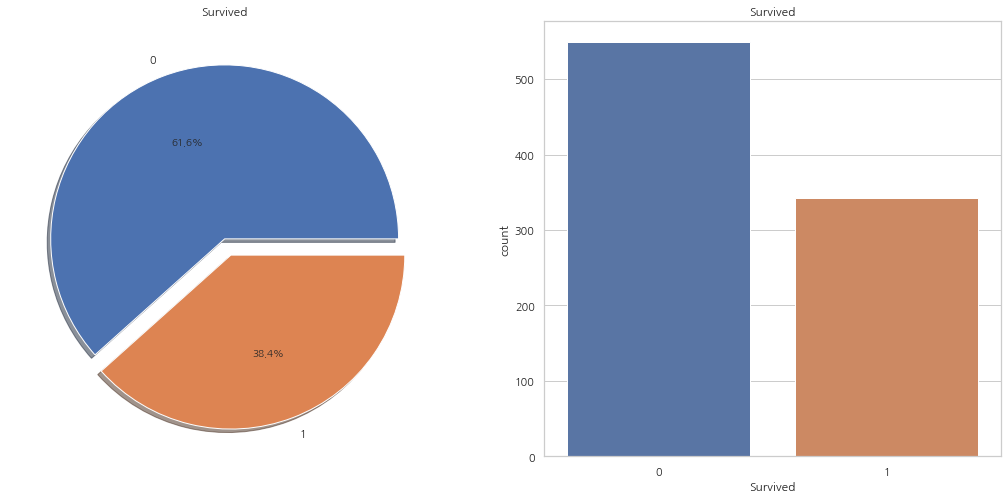

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data["Survived"].value_counts().plot.pie(explode=[0, 0.1], # explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
                                         autopct="%1.1f%%", # autopct는 부채꼴 안에 표시될 숫자의 형식을 지정
                                         ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot("Survived", data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

전체 승객 중 오직 38.4%만 생존한 모습.

먼저, 더 나은 인사이트를 얻기 위해 다른 feature들을 이해해봅시다

## Types of Features

### Categorical Features:
범주형 변수는 두개 혹은 그 이상의 값으로 카테고리화할 수 있습니다. 예를 들어, 성별을 두개의 카테고리를 가진 변수입니다. 이러한 변수들은 정렬을 하거나 순서가 없다는 특징이 있고, **Nominal Variable(명목형 변수)**라고도 불립니다.

**데이터 세트에서의 범주형 Features: Sex, Embarked**  
  
<br/>    
   


### Ordinal Features
순서형 변수는 범주형 변수와 비슷하지만, 값들을 정렬할 수 있다는 특징이 있습니다. (e.g Tall, Medium, Short을 값으로 가지는 Height)

**데이터 세트에서의 순서형 Features: PClass**

<br/>    

### Continous Feature:
두 값 사이에 무수히 많은 값이 들어 갈 수 있거나 최대값, 최솟값 사이에 값이 들어갈 수 있다면 연속형 변수라고 부릅니다.

**데이터 세트에서의 연속형 Features: Age**

## Analysing The Features

### Sex--> Categorical Feature

In [6]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

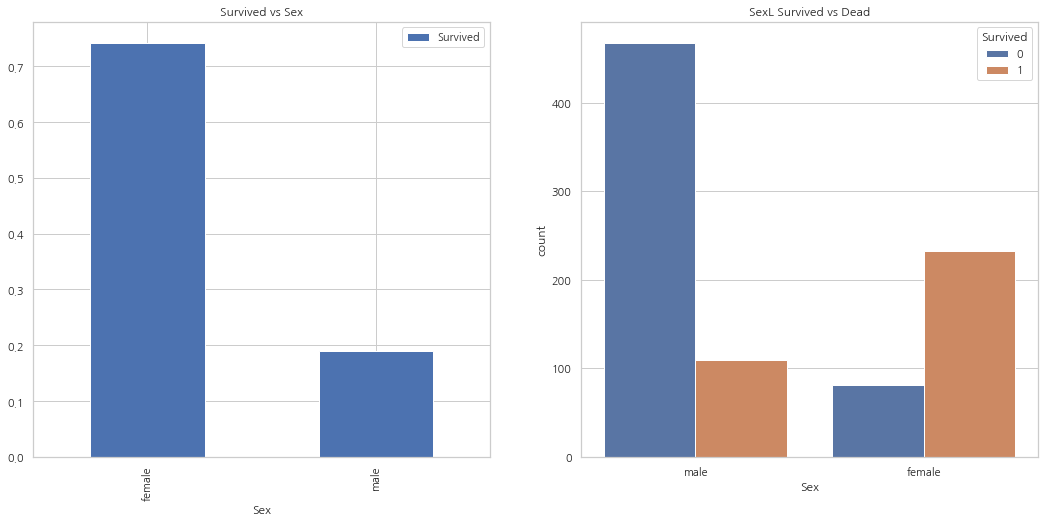

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("SexL Survived vs Dead")
plt.show()

여성보다 남성의 수가 많지만, 생존자의 수는 여성이 남성의 두배. 여성은 약 75%가 살아남았고, 남성은 약 18~19%가 살아남은 모습

### Pclass --> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


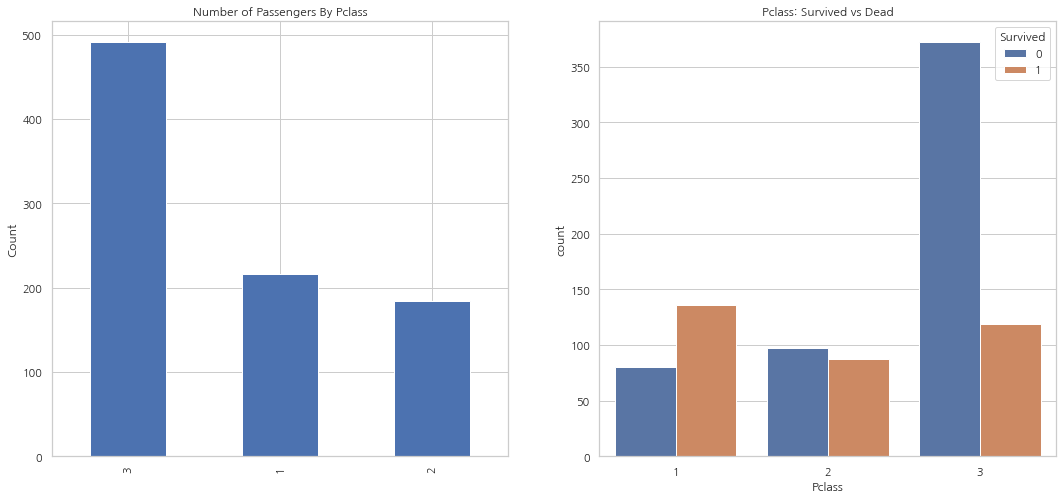

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

1등석 탑승객이 확실히 생존자가 많은 모습(생존률 약 63%). 3등석 탑승객이 제일 많았지만, 생존률은 약 25%. 2등석 탑승객의 생존률은 약 48%

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

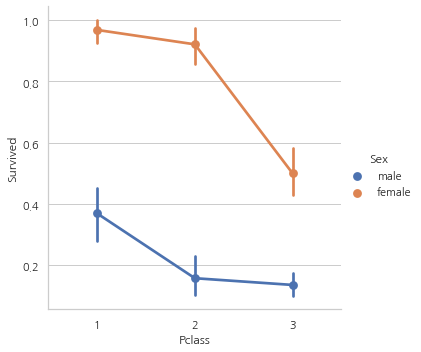

In [11]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=data)
plt.show()

위의 CrossTab과 Factorplot을 보면, 1등석에 탄 여성 탑승객은 약 95~96%가 생존 (94명 중에서 3명만 사망).

이는 탑승석에 상관 없이, 여성이 구출하는 동안의 최우선 우선 순위였다는 증거

### Age--> Continous Feature

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


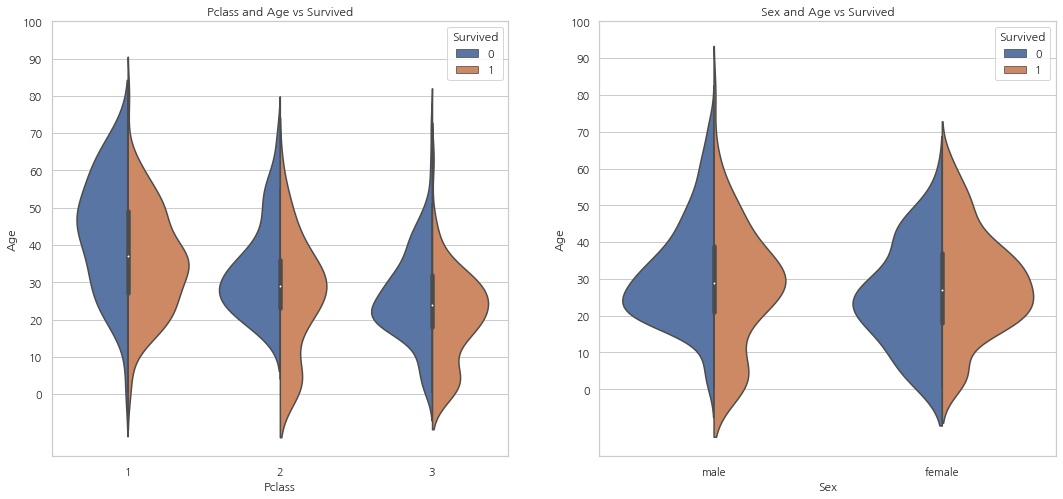

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 탑승석에 따라 아이의 수는 증가하고 10살 이하의 탑승객들은 탑승석과 상관없이 양호한 모습
- 1등석의 20-50대 승객은 생존 가능성이 높으며 여성의 경우 특히 더 높다.
- 남성의 경우 나이가 들수록 생존 가능성이 감소

위에서 봤듯이 Age는 177개의 null 값을 가진다. 이 null 값들은 데이터세트의 Age의 평균을 넣어줘 null 값을 제거해줄 수 있다.

하지만, 여기서 문제는 4살짜리 아이에게 평균 나이인 29살을 값으로 넣어주는 것과 같이 전혀 맞지 않는 나이대를 할당해주는 문제가 생길 수 있다는 것. 어떻게 나이대의 힌트를 얻을 수 있을까?

<br/>

그건 바로 **Name 칼럼**. Mr나 Mrs 같은 단어를 통해 각각 그룹에 다른 평균 나이를 넣어준다.

In [14]:
data["Initial"] = 0
for i in data:
    data["Initial"] = data.Name.str.extract("([A-Za-z]+)\.")

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Initial 칼럼엔 Mlle이나 Mme 같이 Miss를 잘못 표기한 값이 있습니다. 이러한 값들을 모두 Miss로 바꿔주고 다른 값들도 이와 같이 값들을 수정해줍니다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [18]:
data.loc[(data.Age.isnull()) & (data.Initial == "Mr"), "Age"] = 33
data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"), "Age"] = 36
data.loc[(data.Age.isnull()) & (data.Initial == "Master"), "Age"] = 5
data.loc[(data.Age.isnull()) & (data.Initial == "Miss"), "Age"] = 22
data.loc[(data.Age.isnull()) & (data.Initial == "Other"), "Age"] = 46

In [19]:
data.Age.isnull().any()

False

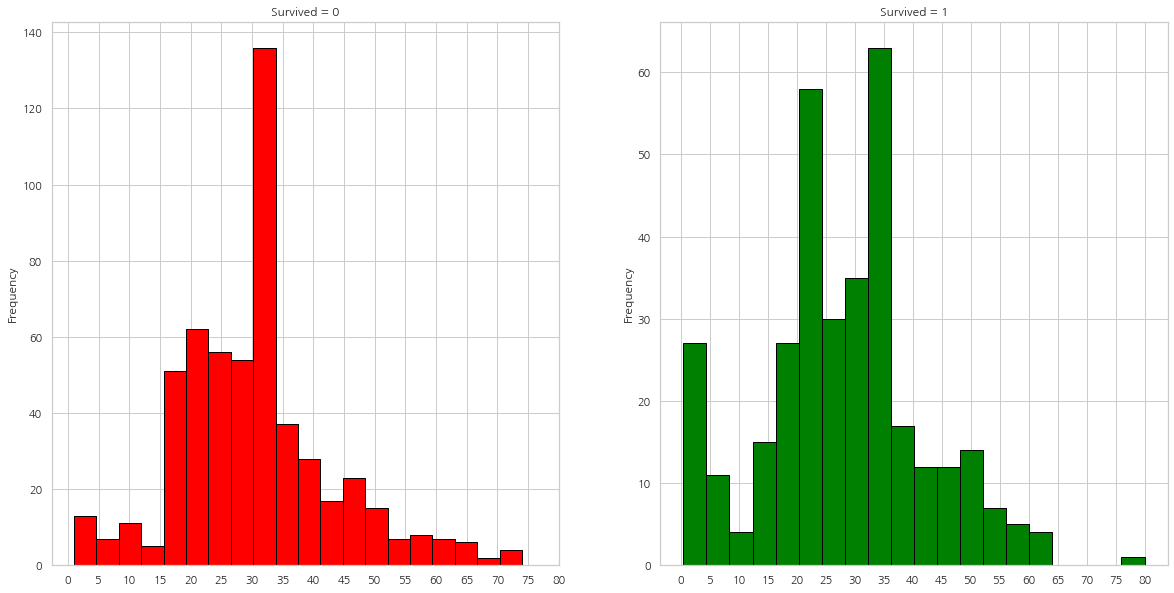

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data["Survived"] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor="black",
                                          color="red")
ax[0].set_title("Survived = 0")
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data["Survived"] == 1].Age.plot.hist(ax=ax[1], color="green", bins=20,
                                          edgecolor="black")
ax[1].set_title("Survived = 1")
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

- 5살 이하의 아이들은 많은 수가 생존
- 가장 나이가 많은 탑승객은 생존
- 가장 많은 수가 죽은 연령대는 30-40대

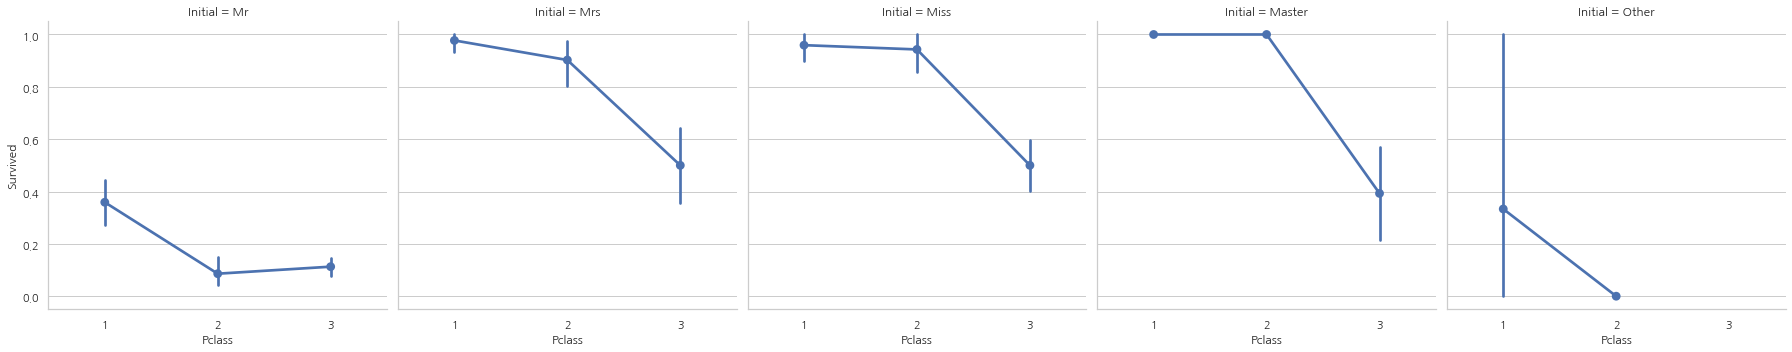

In [21]:
sns.factorplot("Pclass", "Survived", col="Initial", data=data)
plt.show()

여성과 아동 우선 정책은 탑승석에 관계없이 유효

### Embarked--> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap="summer_r")
# margins=True는 ALL을 표시해준다.

**탑승항의 따른 생존 가능성**

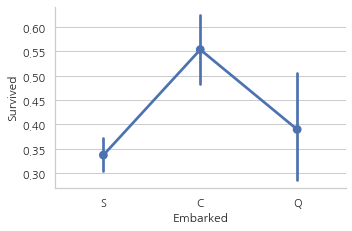

In [23]:
sns.factorplot("Embarked", "Survived", data=data)
fig = plt.gcf() # 현재 figure에 접근하고 싶은 경우 ㅅ ㅏ용
fig.set_size_inches(5, 3)
plt.show()

생존률은 약 55%로 C가 가장 높으며, S가 가장 낮은 상태

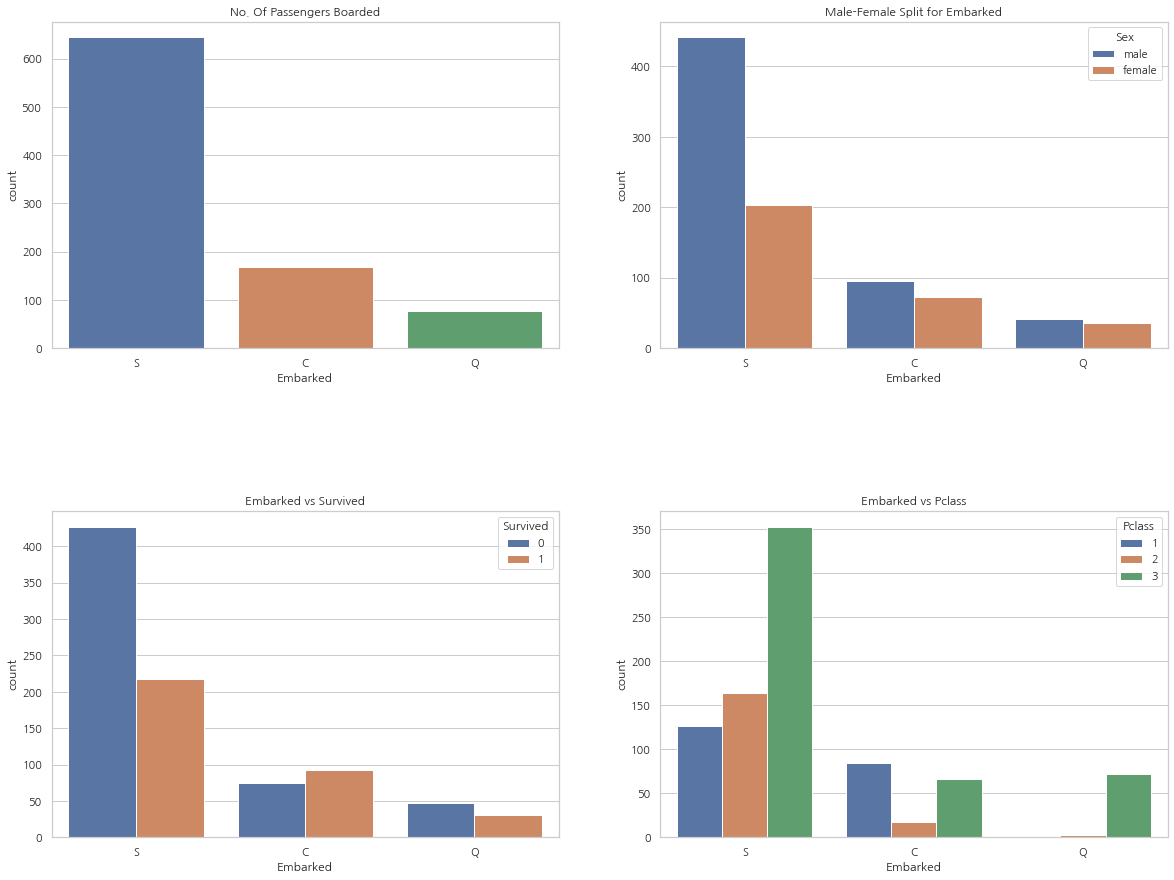

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot("Embarked", data=data, ax=ax[0, 0])
ax[0, 0].set_title("No. Of Passengers Boarded")
sns.countplot("Embarked", hue="Sex", data=data, ax=ax[0, 1])
ax[0, 1].set_title("Male-Female Split for Embarked")
sns.countplot("Embarked", hue="Survived", data=data, ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs Survived")
sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs Pclass")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가장 많은 승객들이 S에서 탑승했으며, 그들중 다수는 3등석
- C에서 탑승한 승객의 생존률이 양호. 그 이유로는 1등석과 2등석의 탑승객 덕분일 것
- 3등석의 81%가 생존하지 못했는데 이들 중 다수는 S에서 탑승
- Q는 95%의 탑승객이 3등석

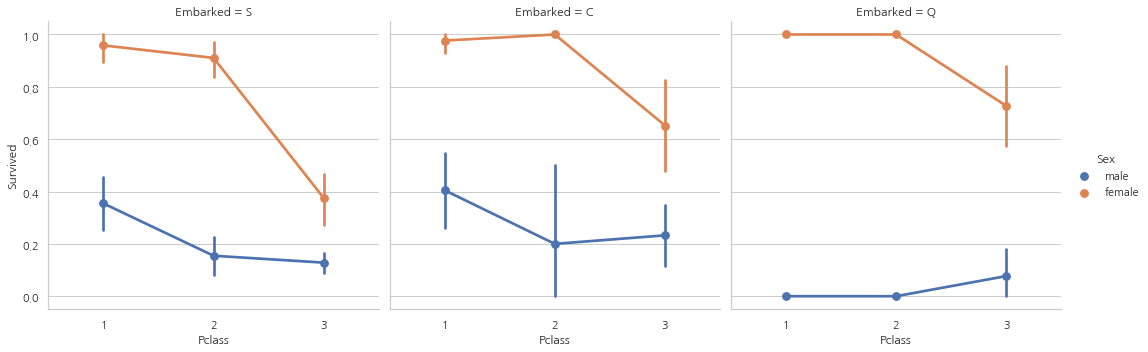

In [25]:
sns.factorplot("Pclass", "Survived", hue="Sex", col="Embarked", data=data)
plt.show()

- 1등석과 2등석에 탑승한 여성은 탑승석과 상관없이 생존률은 거의 100%
- S를 통해 3등석에 탑승한 탑승객은 성별과 상관없이 생존률이 매우 낮다.
- Q를 통해 탑승한 대부분이 3등석이기 때문에 남성들의 생존률이 굉장히 낮은 모습

#### Filling Embarked NaN
위에서 보았듯이 가장 많은 승객이 S를 통해 탑승하였기 때문에, Embarked 칼럼의 NaN을 S로 바꿔준다.

In [26]:
data["Embarked"].fillna("S", inplace=True)

In [27]:
data.Embarked.isnull().any()

False

### SibSp-->Discrete Feature
이 칼럼은 사람이 혼자 탑승했는지 가족 구성원들이 있는지 나타낸다.

<br/>

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


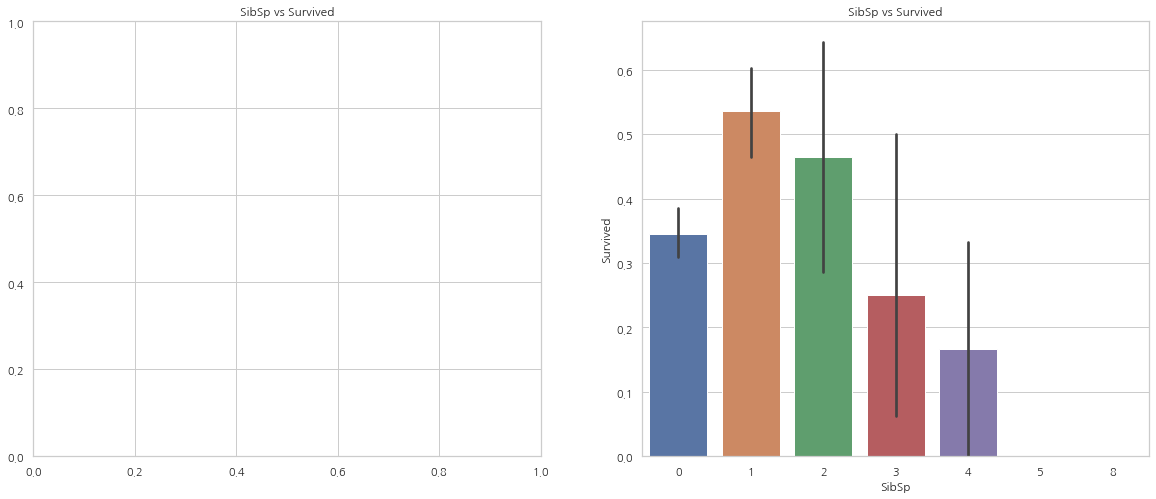

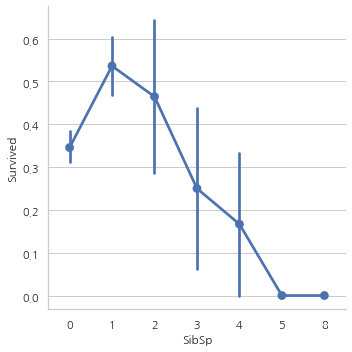

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot("SibSp", "Survived", data=data, ax=ax[1])
ax[1].set_title("SibSp vs Survived")
sns.factorplot("SibSp", "Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")
# plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


위의 그래프에서 볼 수 있듯이, 탑승객이 홀로 탑승했다면 생존률은 34.5%. 위의 그래프는 또한 같이 탑승한 사람의 수가 증가할수록 생존률이 감소하는 모습을 보여준다.

함께 탑승한 가족의 수가 5명 이상인 경우 생존률이 0%인데 표에서 알 수 있듯이 Pclass 문제.

### Parch

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


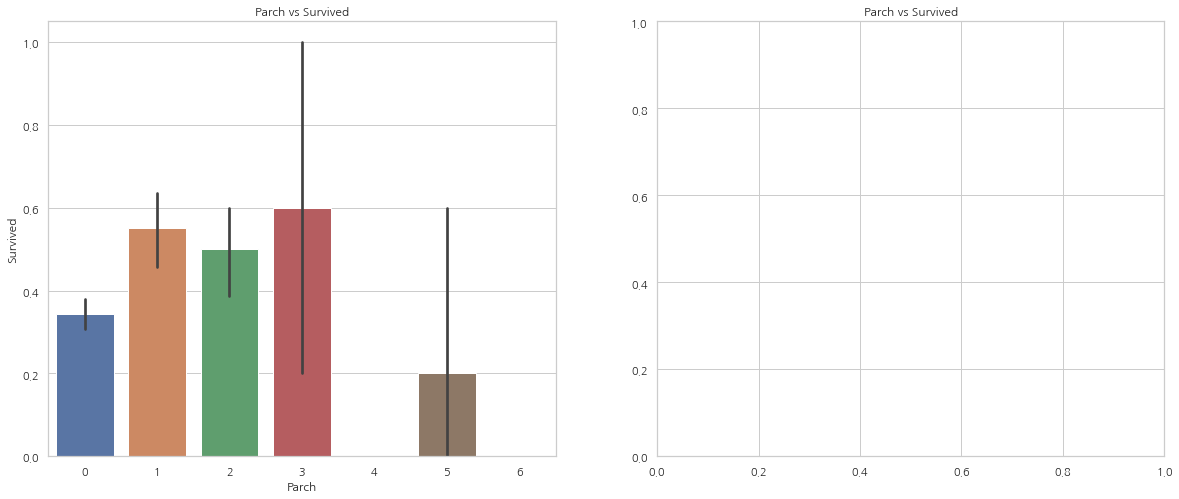

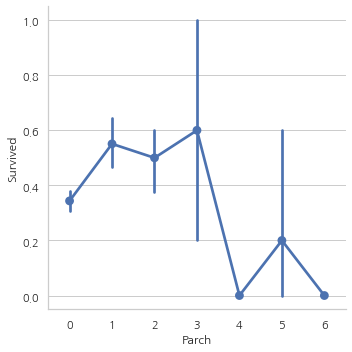

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot("Parch", "Survived", data=data, ax=ax[0])
ax[0].set_title("Parch vs Survived")
sns.factorplot("Parch", "Survived", data=data, ax=ax[1])
ax[1].set_title("Parch vs Survived")
# plt.close(2)
plt.show()

여기서 보여주는 그래프 결과 또한 비슷하다. 같이 탄 사람의 수가 많을수록 생존률이 감소하는 모습

### Fare--> Continous Feature

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


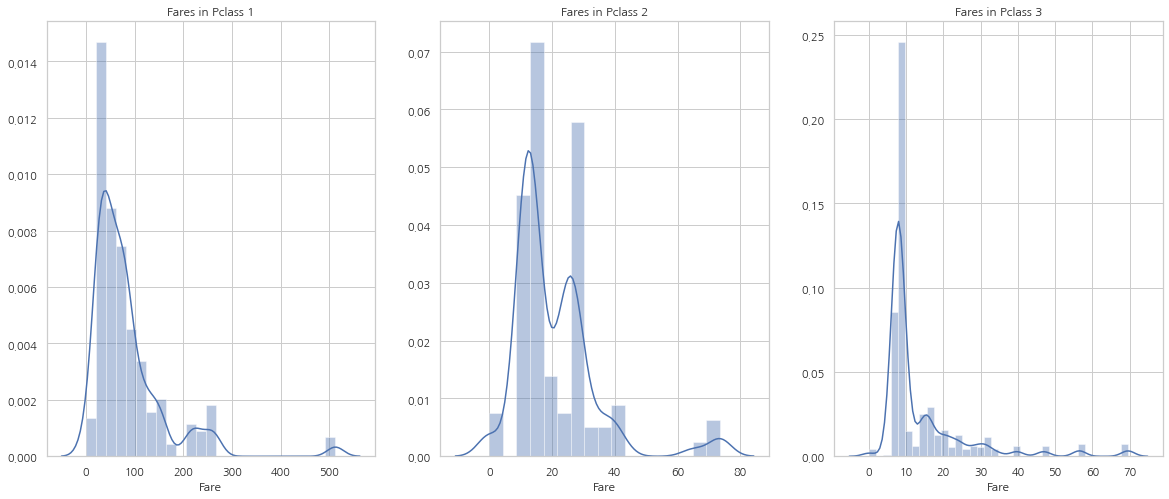

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data["Pclass"] == 1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")

sns.distplot(data[data["Pclass"] == 2].Fare, ax=ax[1])
ax[1].set_title("Fares in Pclass 2")

sns.distplot(data[data["Pclass"] == 3].Fare, ax=ax[2])
ax[2].set_title("Fares in Pclass 3")

plt.show()

Fare는 연속형 자료이므로 Data Bining을 통해 이산 값으로 바꿀 수 있다.

### 모든 Feature들을 간략하게 살펴보면:

**Sex:** 남성과 비교했을시 여성의 생존 가능성이 크다.

**Pclass:** 1등석 탑승객의 생존 가능성이 크고, 3등석 탑승객의 생존 가능성은 매우 낮다. 여성의 경우, 1등석에 탑승한 경우 생존률은 거의 100%

**Age:** 5-10세의 아이들은 생존 가능성이 매우 높으며 15-35세의 탑승객이 많이 사망

**Embarked:** C에서 탑승한 탑승객은 심지어 S을 통해 1등석에 탑승한 승객보다 생존 가능성이 높으며 Q에서의 탑승객은 대부분 3등석

**Parch+SibSp:** 1\~2명의 자식 혹은 배우자와 함께 탑승했거나 1~3명의 부모님과 함께 탑승한 탑승객은 홀로 탑승했거나 대가족인 경우의 탑승객보다 생존 가능성이 높다.

### Correlation Between The Features

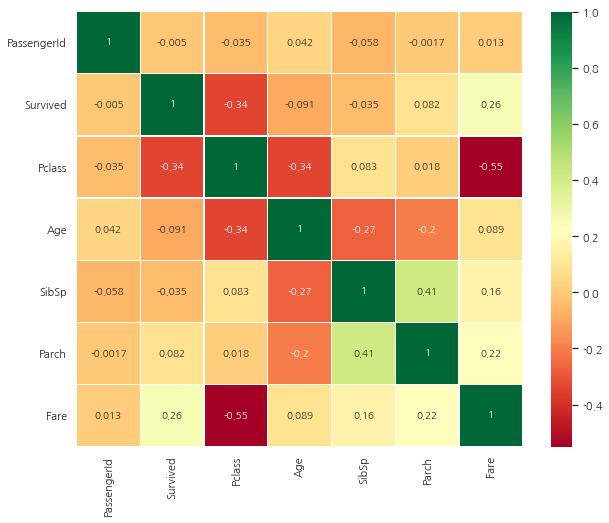

In [35]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### 히트맵 해석하기

먼저 주목해야할 것은 알파벳이나 문자열의 경우 상관관계를 비교할 수 없기 때문에 숫자형 칼럼들만 비교했다.

    0.7을 초과하면 MultiColinearity(두 변수간의 상관관계가 높은 것을 의미)를 우려해야 한다. 이에 대한 대책은 샘플 수를 증가시키는 것 외에는 없다.

--------------

## Part2: Feature Engineering and Data Cleaning

### Age-bond

Age 칼럼은 연속형 자료, 연속형 자료들은 머신러닝 모델에서 문제가 있다. (값이 너무 다양해져 머신러닝 모델에 도움이 되지 않는다)

따라서, Bining이나 Normalization을 통해 범주형 자료로 변환해줘야 한다.

여기에서는 Bining을 할 예정이며 최고 나이대가 80살이기 때문에 5등분을 할 예정

In [36]:
data["Age_band"] = 0
data.loc[data["Age"] <= 16, "Age_band"] = 0
data.loc[(data["Age"] > 16) & (data['Age'] <= 32), "Age_band"] = 1
data.loc[(data["Age"] > 32) & (data['Age'] <= 48), "Age_band"] = 2
data.loc[(data["Age"] > 48) & (data['Age'] <= 64), "Age_band"] = 3
data.loc[(data["Age"] > 64), "Age_band"] = 4
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
284,285,0,1,"Smith, Mr. Richard William",male,33.0,0,0,113056,26.0000,A19,S,Mr,2
727,728,1,3,"Mannion, Miss. Margareth",female,22.0,0,0,36866,7.7375,NaN,Q,Miss,1
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,Mr,2
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,36.0,0,0,343095,8.0500,NaN,S,Mrs,2
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,36.0,1,0,19996,52.0000,C126,S,Mrs,2


In [37]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,Age_band
1,382
2,325
0,104
3,69
4,11


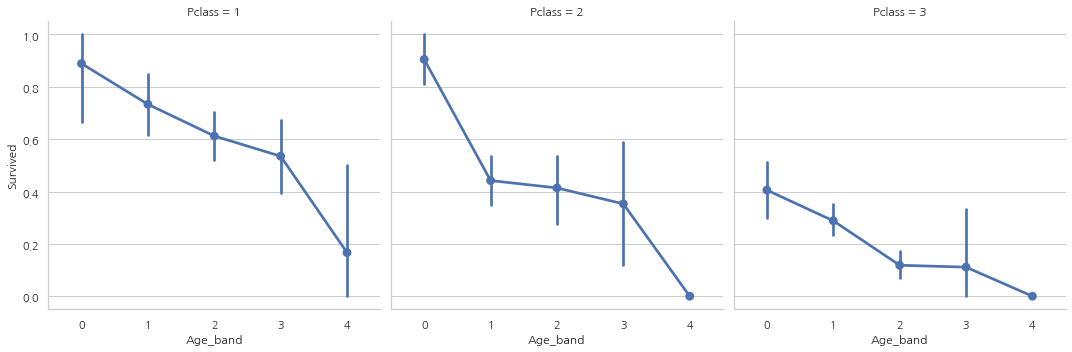

In [38]:
sns.factorplot("Age_band", "Survived", data=data, col="Pclass")
plt.show()

탑승석에 상관없이 나이가 증가할수록 생존률이 감소하는 모습

### Family_Size and Alone

Parch와 SibSp 칼럼을 합친 Famil_size 칼럼을 만들어 가족 사이즈가 생존률과 상관이 있는지 없는지 확인할 예정

Alone은 혼자 탑승했는지 아닌지 나타내주는 칼럼

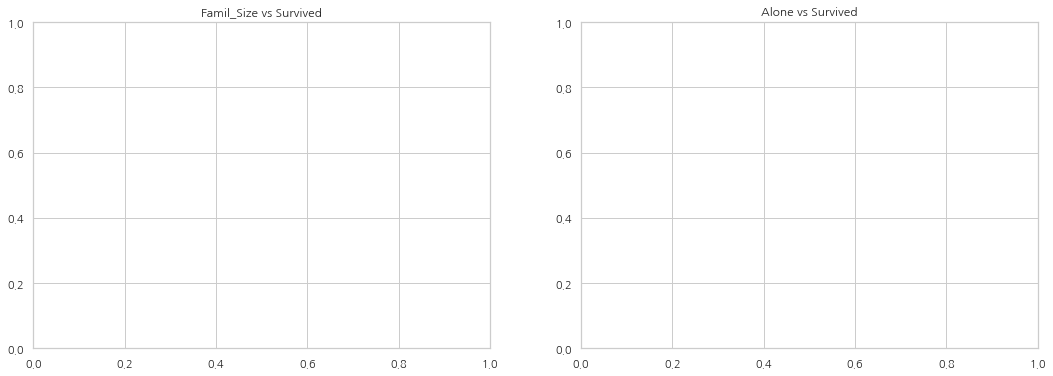

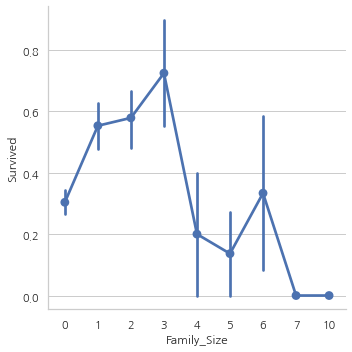

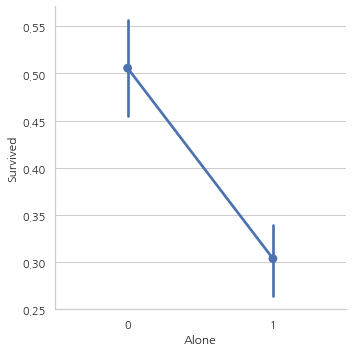

In [39]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]
data["Alone"] = 0
data.loc[data.Family_Size == 0, "Alone"] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot("Family_Size", "Survived", data=data, ax=ax[0])
ax[0].set_title("Famil_Size vs Survived")
sns.factorplot("Alone", "Survived", data=data, ax=ax[1])
ax[1].set_title("Alone vs Survived")
plt.show()

Family_Size가 0이거나 Alone인 경우 생존률이 굉장히 낮고, Famil_Size가 4보다 커지면 생존 가능성이 감소한다.

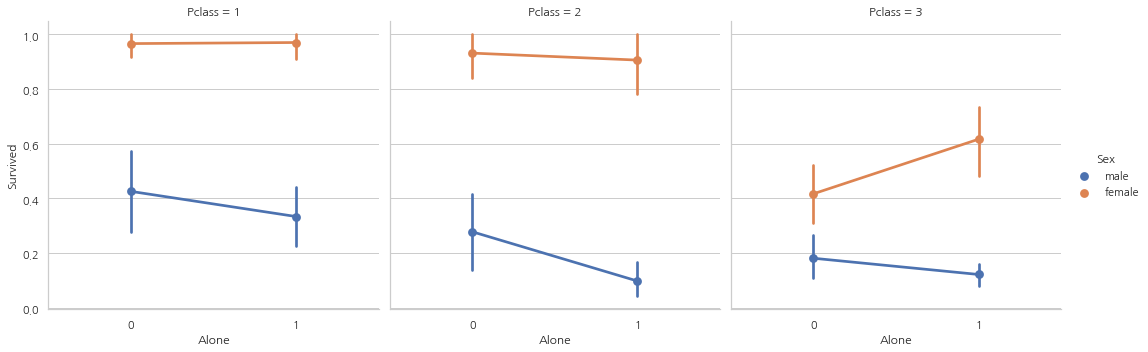

In [40]:
sns.factorplot("Alone", "Survived", data=data, hue="Sex", col="Pclass")
plt.show()

3등석을 제외하곤 성별과 탑승석 상관없이 혼자 탑승하는 것은 생존 가능성이 낮다는 것을 발견

### Fare_Range

In [41]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 커질수록 생존 가능성이 증가하는 모습

하지만, 지금 이 값 그대로 넘겨줄 순 없고, Age_Band에서 했던 것처럼 단일 값으로 바꿔줘야 한다.

In [42]:
data["Fare_cat"] = 0
data.loc[data["Fare"] <= 7.91, "Fare_cat"] = 0
data.loc[(data["Fare"] > 7.91) & (data["Fare"] <= 14.454), "Fare_cat"] = 1
data.loc[(data["Fare"] > 14.454) & (data["Fare"] <= 31), "Fare_cat"] = 2
data.loc[(data["Fare"] > 31) & (data["Fare"] <= 513), "Fare_cat"] = 3

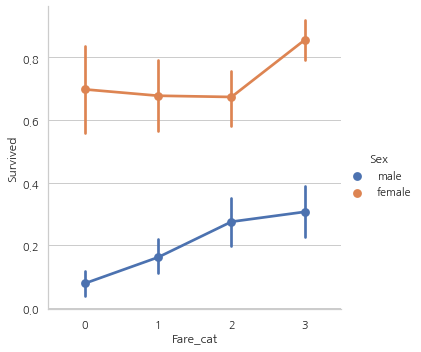

In [43]:
sns.factorplot("Fare_cat", "Survived", data=data, hue="Sex")
plt.show()

Fare_cat이 증가할수록 생존률도 증가하는 모습

### Converting String Values into Numeric

머신러닝 모델에는 문자열을 전달할 수 없기 때문에 Sex, Embarked 등과 같은 칼럼들을 숫자형 값으로 바꿔줘야 한다.

In [44]:
print(data["Initial"].unique())
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
data["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0, 1, 2, 3, 4], inplace=True)

['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [45]:
data["Sex"].unique(), data["Embarked"].unique(), data["Initial"].unique()

(array([0, 1], dtype=int64),
 array([0, 1, 2], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64))

### 필요없는 Feature 제거

**Name-->** 범주형으로 바꿀 수 없기 때문에

**Age-->** Age_band feature가 있기 때문에

**Ticket-->** 랜덤하게 표시된 문자열이기 때문에 범주화를 할 수 없어서

**Fare-->** Fare_cat feature가 있기 때문에

**Cabin-->** NaN 값이 너무 많고, 많은 승객들이 여러개의 Cabin을 사용해서

**Fare_Range-->** Fare_cat feature가 있기 때문에

**PassengerID-->** 범주형으로 바꿀 수 없기 때문에

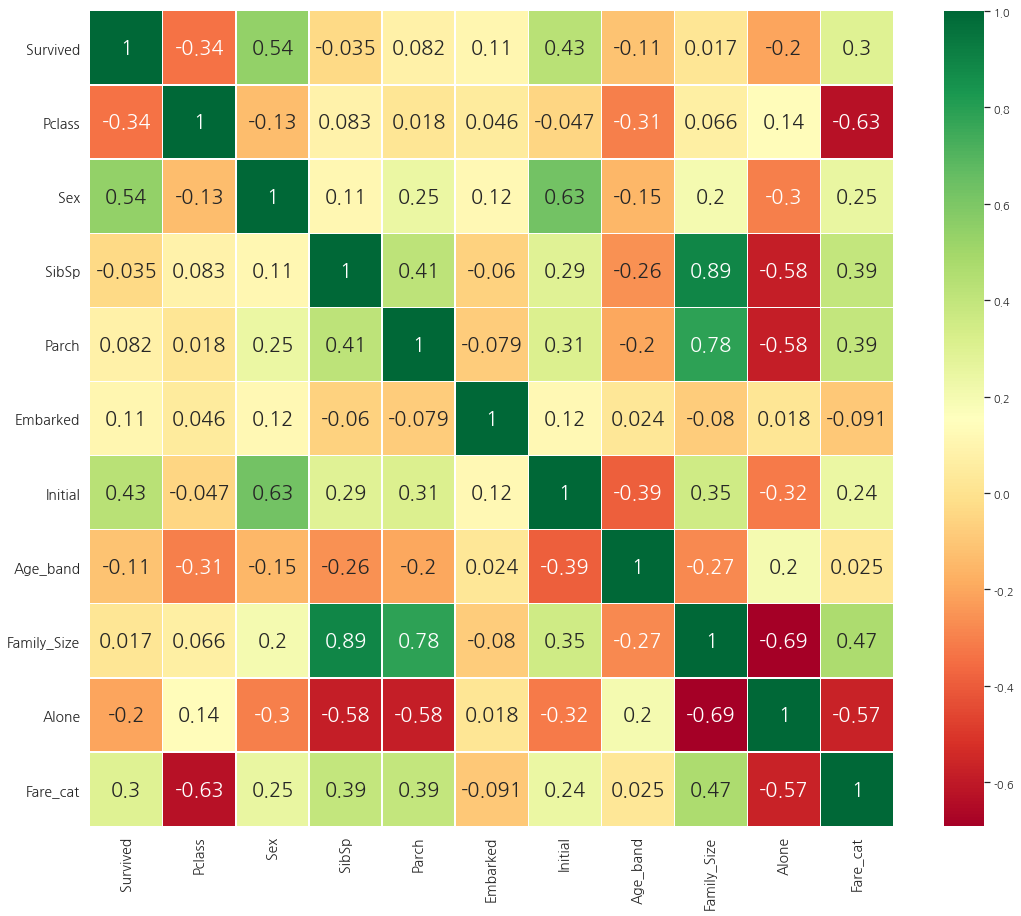

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],
          axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2,
            annot_kws={"size": 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

--------------

## Part3: Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
data.head(1)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0


In [49]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data["Survived"])
# stratify: default=None 입니다. 
# classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 
# 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data["Survived"]

#### Radial Support Vector Machines(rbf-SVM)

In [50]:
model = svm.SVC(kernel="rbf", C=1, gamma=0.1)
model.fit(train_X, train_Y)
predictions1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(predictions1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [51]:
model = svm.SVC(kernel="linear", C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


KNN 모델은 n_neighbors 속성의 값을 바꿀때마다 정확도가 변합니다.

default=5, n_neightbors 값의 변화에 따른 정확도를 확인해봅시다.

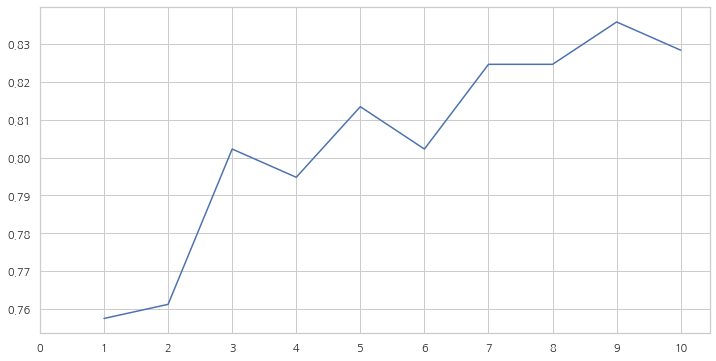

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [55]:
a_index = list(range(1, 11))
a = pd.Series()
x = range(11)
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [56]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


모델의 정확도가 분류기의 Robustness를 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 90%의 정확도를 기록했다고 가정해봅시다.

분류기의 정확도가 매우 좋은 것 같지만, 오는 모든 새로운 테스트 세트에 대해 90%의 정확도를 보인다고 할 수 있을까요? 당연히 아닙니다.

데이터가 변경되면 정확도도 변하게 됩니다. 이를 model variance라고 합니다.

이러한 문제점을 극복하고 일반화된 모델을 얻기 위해 Cross Validation을 사용합니다.

### Cross Validation

1) K-Fold Cross Validation은 먼저 k개로 나눈다.

2) 5개로 나눴다고 하면, 1개는 테스트용으로 남겨놓고 나머지 4개는 알고리즘을 통해 학습을 한다.

3) 이 과정을 반복해준다. (테스트용 데이터세트를 바꿔가며)

<img src="https://miro.medium.com/max/1202/1*PdwlCactbJf8F8C7sP-3gw.png" width="8000px" height="3000px" title="Github_Logo"/>


In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel="linear"), svm.SVC(kernel="rbf"), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({"CV Mean": xyz, "Std": std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.801373,0.047554
Naive Bayes,0.795843,0.054861
Random Forest,0.814856,0.050373


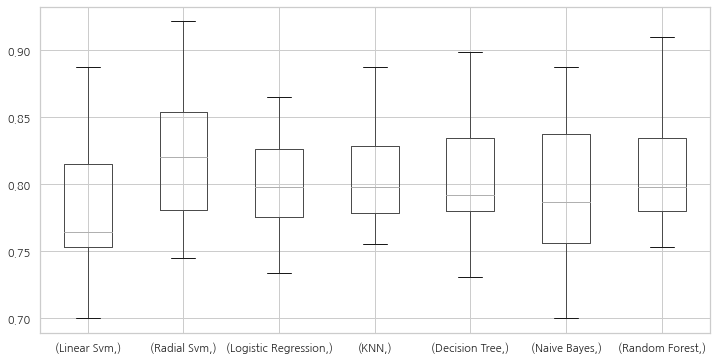

In [59]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

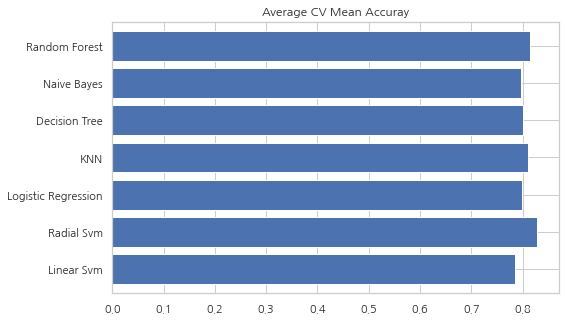

In [60]:
new_models_dataframe2["CV Mean"].plot.barh(width=0.8)
plt.title("Average CV Mean Accuray")
fig = plt.gcf()
fig.set_size_inches(8 ,5)
plt.show()

분류 정확도는 때때로 데이터의 불균형으로 인하여 오해의 소지가 있을 수 있습니다.

혼동 행렬(Confusion Matrix)을 통해 모델에서 어디에서 잘못했는지 어떤 클래스를 잘못 예측했는지를 보여주는 요약된 결과를 볼 수 있습니다.

### Confusion Matrix

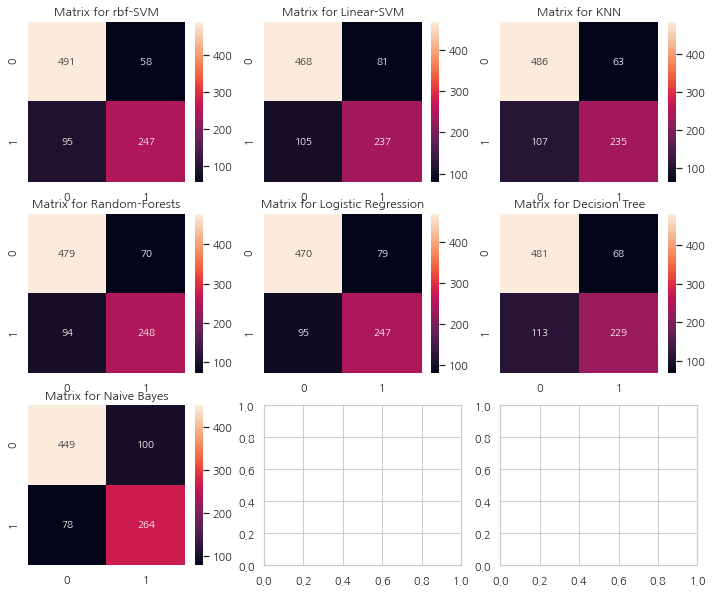

In [61]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel="rbf"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt="2.0f")
ax[0, 0].set_title("Matrix for rbf-SVM")

y_pred = cross_val_predict(svm.SVC(kernel="linear"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt="2.0f")
ax[0, 1].set_title("Matrix for Linear-SVM")

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt="2.0f")
ax[0, 2].set_title("Matrix for KNN")

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt="2.0f")
ax[1, 0].set_title("Matrix for Random-Forests")

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt="2.0f")
ax[1, 1].set_title("Matrix for Logistic Regression")

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt="2.0f")
ax[1, 2].set_title("Matrix for Decision Tree")

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt="2.0f")
ax[2, 0].set_title("Matrix for Naive Bayes")

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### 혼동 행렬 해석

왼쪽 대각선은 각 클래스에 대해 올바르게 예측한 수를 나타내고 오른쪽 대각선은 잘못 예측한 수를 나타낸다. rbf-SVM의 경우를 살펴보면

1) 올바르게 예측한 수는 **491(죽은 사람) + 247(생존한 사람)**. 정확도는 **(491+247)/891 = 82.8%**

2) 58명의 사망자를 생존했다고 잘못 예측했으며 95명의 생존자를 사망했다고 잘못 예측하였다.

<br/>

이 혼동 행렬들을 보면 rbf-SVM은 사망자에 대해 옳게 예측할 확률이 높으며 NaiveBayes의 경우는 생존한 사람에 대해 옳게 예측할 확률이 높다.

### Hyper-Parameters Tuning

#### SVM

In [62]:
from sklearn.model_selection import GridSearchCV

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ["rbf", "linear"]
hyper = {"kernel": kernel, "C": C, "gamma": gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [63]:
n_estimators = range(100, 1000, 100)
hyper = {"n_estimators": n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper,
                  verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


SVM에서의 최고 점수는 약 82.82%, RandomForest는 82.04%

### Ensembling

앙상블은 모델의 성능을 높이기 위한 좋은 수단입니다. 앙상블은 간단히 말하면 여러개의 모델을 합쳐 하나의 모델을 만드는 것입니다.

앙상블은 모델의 안전성을 높이며 아래의 3가지 방법으로 가능합니다.

1) Voting Classifier

2) Bagging

3) Boosting

#### Voting Classifier

여러 머신러닝 모델에서의 예측값을 합치는 가장 간단한 방법. 각각의 서브모델에서의 예측값을 모두 더해 평균값을 구해준다.

In [64]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[("KNN", KNeighborsClassifier(n_neighbors=10)),
                                                ("RBF", svm.SVC(probability=True, kernel="rbf", C=0.4, gamma=0.3)),
                                                ("RFor", RandomForestClassifier(n_estimators=300, random_state=0)),
                                                ("LR", LogisticRegression(C=0.05)),
                                                ("DT", DecisionTreeClassifier(random_state=0)),
                                                ("NB", GaussianNB()),
                                                ("svm", svm.SVC(kernel="linear", probability=True))], voting="soft").fit(train_X, train_Y)

print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8238202247191012


#### Bagging

Bagging은 일반적인 방법입니다. 데이터 세트의 작은 부분에 유사한 분류기를 적용해 모든 예측의 평균을 취하는 식으로 작동합니다. 평균을 취하기 때문에 모델 분산(model variance)의 감소가 있습니다. 

Voting Classifier와 다르게 Bagging은 유사한 분류기를 사용합니다.

##### Bagged KNN

Bagging은 높은 분산을 가진 모델에서 잘 작동합니다. n_neighbours을 작게 설정한 KNN을 사용해보겠습니다.

In [65]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                          random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


##### Bagged DecisionTree

In [66]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0,
                          n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
reuslt = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8104244694132333


#### Boosting
Boosting은 분류기의 순차적 학습을 사용하는 앙상블 기법입니다. 단계적으로 약한 부분을 강화합니다.

Boosing은 다음과 같이 작동합니다: <br/>

이제 모델은 일부 인스턴스를 바르게, 일부는 틀리게 가져옵니다. 다음 반복에선 learner는 잘못 예측된 인스턴스에 더 집중하거나 많은 가중치를 부여할 것입니다. 그래서 잘못 예측한 인스턴스를 바르게 예측하도록 시도합니다. 이제 이 반복 프로세스가 계속되고 정확도의 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

##### AdaBoost(Adaptive Boosting)
이 경우 Decision Tree를 이용. 하지만 기본 base_estimator를 다른 알고리즘으로 바꿀 수 있습니다.

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring="accuracy")
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting
여기 또한 Decision Tree

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring="accuracy")
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [69]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring="accuracy")
print('The cross validated score for XGBoost is:',result.mean())

[14:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

AdaBoost가 가장 높은 정확도를 보입니다. 이제 Hyperparameter Tuning을 통해 성능을 높여 봅시다.

##### Hyper-Parameter Tuning for AdaBoost

In [70]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {"n_estimators": n_estimators, "learning_rate": learning_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost의 최고 정확도는 82.9% (n_estimators=100, learning_rate=0.1)

#### Confusion Matrix for the Best Model

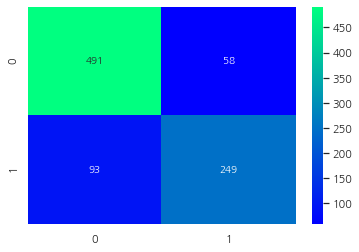

In [71]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap="winter", annot=True, fmt="2.0f")
plt.show()

### Feature Importance

[14:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


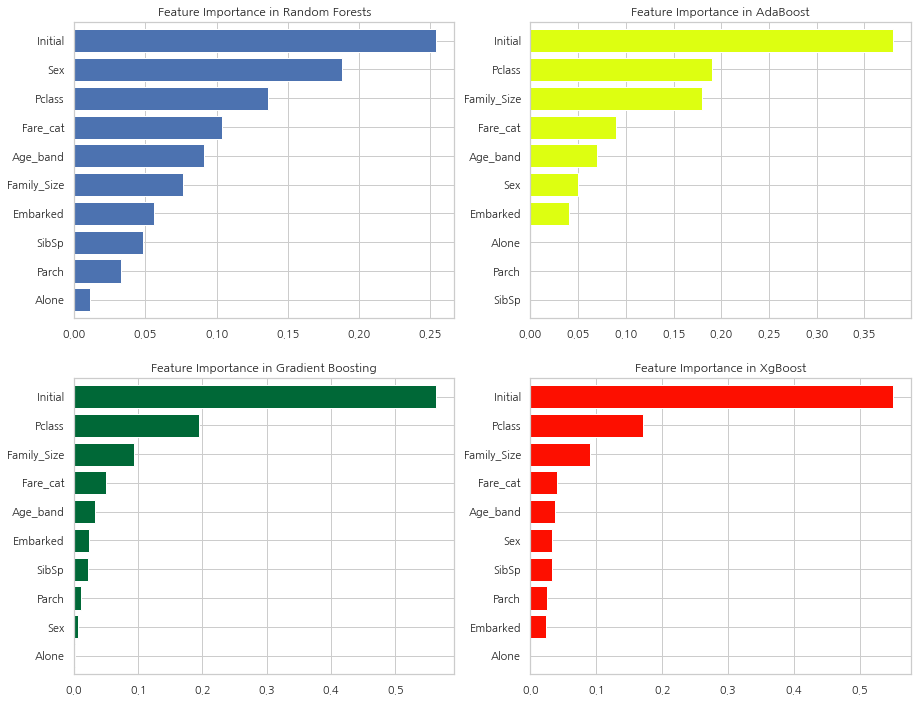

In [72]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title("Feature Importance in Random Forests")

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color="#ddff11")
ax[0, 1].set_title("Feature Importance in AdaBoost")

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap="RdYlGn_r")
ax[1, 0].set_title("Feature Importance in Gradient Boosting")

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color="#FD0F00")
ax[1, 1].set_title("Feature Importance in XgBoost")
plt.show()

다양한 분류기의 feature 중요도를 파악했습니다.

**확인할 수 있는점:**

1) 공통의 중요한 Feature은 Initial, Fare_cat, Pclass, Family_Size

2) Sex Feature은 의외로 그닥 중요해 보이지 않는다. 앞에서 Sex와 Pclass를 결합해 큰 차이점을 보여줬던 것을 생각해보면 굉장히 놀랍습니다. Sex Feature은 오직 RandomForest 알고리즘에서만 중요해 보입니다.

하지만, Initial Feature을 보면 모든 Feature 중요도의 꼭대기에 있습니다. 앞에서 히트맵을 통해 Sex와 Initial의 높은 상관관계를 볼 수 있었습니다. 두 Feature 모두 성별을 나타냅니다.

3) 비슷하게 Pclass Fare_cat은 Alone, Parch, SibSp가 있는 승객과 Family_size의 상태를 나타냅니다.

-------

# End